# Coronavirus COVID-19 in Spain and Madrid


-----

Created by [@DiegoDZ](https://github.com/DiegoDZ). Automated data download by [@luismateos92](https://github.com/luismateos92).

Data from Ministerio de Sanidad, https://www.epdata.es/

_____

In [1]:
# Libraries and figure settings

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import requests
sns.set(style="darkgrid")

In [2]:
# Download data

headers = {
    'authority': 'www.epdata.es',
    'pragma': 'no-cache',
    'cache-control': 'no-cache',
    'content-type': 'application/json; charset=UTF-8',
    'origin': 'https://www.epdata.es',
    'sec-fetch-site': 'same-origin',
    'accept-language': 'es-ES,es;q=0.9,en;q=0.8,zh-CN;q=0.7,zh;q=0.6',
}
dataMadrid = '{"Host":"www.epdata.es","Guid":"ebb8e9f0-2c01-4090-bc03-569a348f45dc-304","Formato":"json"}'
dataSpain = '{"Host":"www.epdata.es","Guid":"476812f9-73a2-4b5f-a74c-4824bc8b4a17","Formato":"json"}'
responseMadrid = requests.post('https://www.epdata.es/oembed/get/', headers=headers, data=dataMadrid).json()
responseSpain = requests.post('https://www.epdata.es/oembed/get/', headers=headers, data=dataSpain).json()


# Create raw dataframe

raw_madrid = pd.read_json(responseMadrid)
raw_spain = pd.read_json(responseSpain)

In [3]:
# Dictionaries and constants

day_init_quarantine_spain = 44
day_init_quarantine_madrid = 17
dict_months = {'Enero':1, 'Febrero':2, 'Marzo':3, 'Abril':4, 'Mayo':5, 'Junio':6, 'Julio':7, 'Agosto':8, 'Septiembre':9, 'Octubre':10, 'Noviembre':11, 'Diciembre':12}

In [4]:
# Functions

def createDataframeFromJson(raw_data):
    number_days_monitored = len(raw_data['Respuesta'][0]['Metricas'][0]['Datos'])
    list_cases_dates = []
    for day in range(number_days_monitored):
        date = raw_data['Respuesta'][0]['Metricas'][0]['Datos'][day]['Parametro']
        cases = raw_data['Respuesta'][0]['Metricas'][0]['Datos'][day]['Valor']
        list_cases_dates.append([date, cases])     
    df0 = pd.DataFrame(list_cases_dates, columns = ['Date' , 'Cases'])
    df0[['Day', 'Month']] = df0['Date'].str.extract(r'([\d]+) \((.*?)\)')
    df0.replace({'Month': dict_months}, inplace= True)
    df0['Period'] = '2020' + '/' + df0['Month'].astype(str) + '/' + df0['Day'].astype(str)
    df0['Period'] = df0['Period'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d'))
    df0.drop(['Date', 'Day', 'Month'], axis=1, inplace = True)
    df0.sort_values(by=['Period'], inplace = True)
    df0['Day'] = range(number_days_monitored)
    return df0

def computeMetrics(df0):
    df0['CasesAccum'] = df0['Cases'].cumsum()
    df0['VariationRate'] = df0['Cases'].pct_change() * 100
    df0['VariationRateCum'] = df0['CasesAccum'].pct_change() * 100
    return df0

In [5]:
# Compute dataframe with metrics (Spain)

df_spain = computeMetrics(createDataframeFromJson(raw_spain))
df_spain.head()

,Cases,Period,Day,CasesAccum,VariationRate,VariationRateCum
0,1.0,2020-01-31,0,1.0,NaN,NaN
1,0.0,2020-02-01,1,1.0,-100.0,0.0
2,0.0,2020-02-02,2,1.0,NaN,0.0
3,0.0,2020-02-03,3,1.0,NaN,0.0
4,0.0,2020-02-04,4,1.0,NaN,0.0


In [6]:
# Compute dataframe with metrics (Madrid)

df_madrid = computeMetrics(createDataframeFromJson(raw_madrid))
df_madrid.head()

,Cases,Period,Day,CasesAccum,VariationRate,VariationRateCum
0,2.0,2020-02-27,0,2.0,NaN,NaN
1,1.0,2020-02-28,1,3.0,-50.0,50.000000
2,5.0,2020-02-29,2,8.0,400.0,166.666667
3,4.0,2020-03-01,3,12.0,-20.0,50.000000
4,18.0,2020-03-02,4,30.0,350.0,150.000000


# New daily cases (Spain)

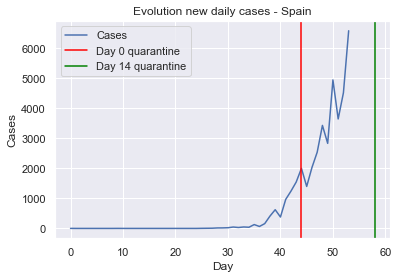

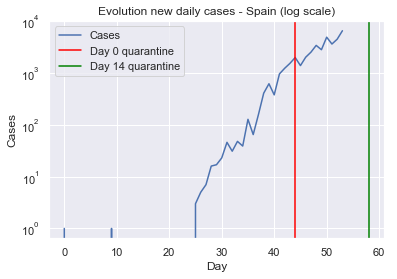

In [7]:
# Daily cases

sns.lineplot('Day', 'Cases', data = df_spain , label = 'Cases')
plt.axvline(day_init_quarantine_spain, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_spain + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases - Spain')
plt.legend()
plt.show()

# - logscale - 
sns.lineplot('Day', 'Cases', data = df_spain , label = 'Cases')
plt.axvline(day_init_quarantine_spain, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_spain + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases - Spain (log scale)')
plt.yscale('log')
plt.legend()
plt.show()

# New daily cases (Madrid)

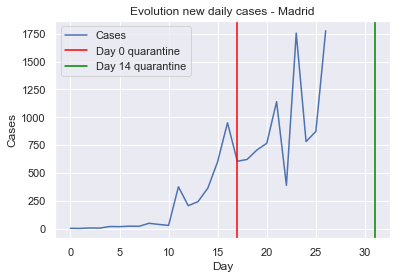

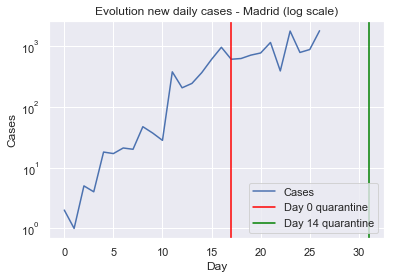

In [8]:
# Daily cases

sns.lineplot('Day', 'Cases', data = df_madrid , label = 'Cases')
plt.axvline(day_init_quarantine_madrid, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_madrid + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases - Madrid')
plt.legend()
plt.show()

# - logscale - 
sns.lineplot('Day', 'Cases', data = df_madrid , label = 'Cases')
plt.axvline(day_init_quarantine_madrid, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_madrid + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases - Madrid (log scale)')
plt.yscale('log')
plt.legend()
plt.show()

# Cumulative daily cases (Spain)

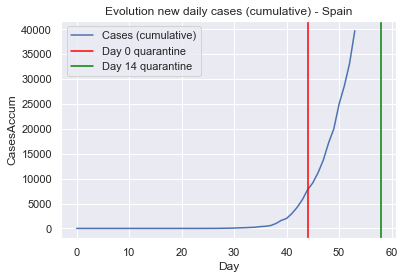

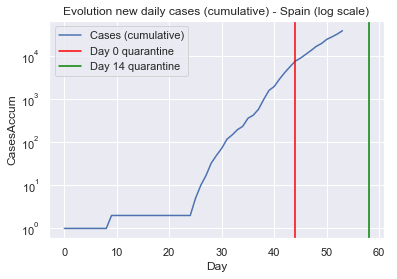

In [9]:
# Daily cases (cumulative)

sns.lineplot('Day', 'CasesAccum', data = df_spain, label = 'Cases (cumulative)')
plt.axvline(day_init_quarantine_spain, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_spain + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases (cumulative) - Spain')
plt.legend()
plt.show()


# - logscale - 
sns.lineplot('Day', 'CasesAccum', data = df_spain, label = 'Cases (cumulative)')
plt.axvline(day_init_quarantine_spain, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_spain + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases (cumulative) - Spain (log scale)')
plt.yscale('log')
plt.legend()
plt.show()

# Cumulative daily cases (Madrid)

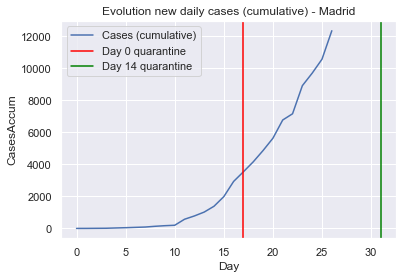

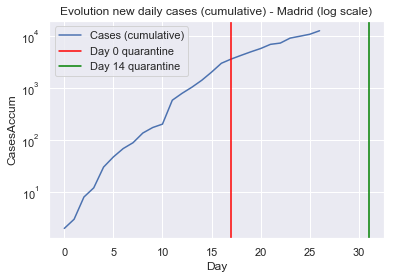

In [10]:
# Daily cases (cumulative)

sns.lineplot('Day', 'CasesAccum', data = df_madrid, label = 'Cases (cumulative)')
plt.axvline(day_init_quarantine_madrid, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_madrid + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases (cumulative) - Madrid')
plt.legend()
plt.show()


# - logscale - 
sns.lineplot('Day', 'CasesAccum', data = df_madrid, label = 'Cases (cumulative)')
plt.axvline(day_init_quarantine_madrid, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_madrid + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Evolution new daily cases (cumulative) - Madrid (log scale)')
plt.yscale('log')
plt.legend()
plt.show()

# Variation rate (Spain)

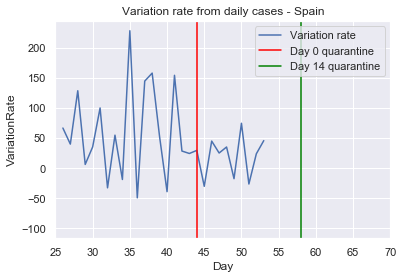

In [11]:
# Variation rate

sns.lineplot('Day', 'VariationRate', data = df_spain, label = 'Variation rate')
plt.xlim(25,70)
plt.axvline(day_init_quarantine_spain, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_spain + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Variation rate from daily cases - Spain')
plt.legend()
plt.show()

La tasa de variación parece que se va estabilizando. Sin embargo, no es un indicativo de que la situación mejore considerablemente. Solo cuando la tasa de variación sea negativa durante varios días estaremos en una situación de reducción del número de contagiados de un día para otro. 

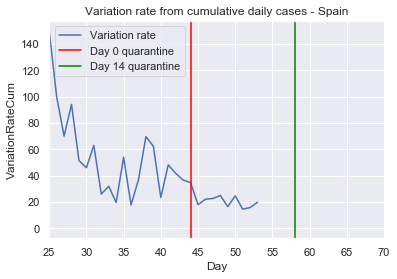

In [12]:
# Variation rate (cumulative) -- Tiene que tender a cero 

sns.lineplot('Day', 'VariationRateCum', data = df_spain, label = 'Variation rate')
plt.xlim(25,70)
plt.axvline(day_init_quarantine_spain, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_spain + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Variation rate from cumulative daily cases - Spain')
plt.legend()
plt.show()

La tasa de variación calculada a partir de nuevos casos acumulados tiene que tender a cero. Cuando esté a cero será un indicativo de que no hay nuevos casos de un día a otro. 

# Variation rate (Madrid)

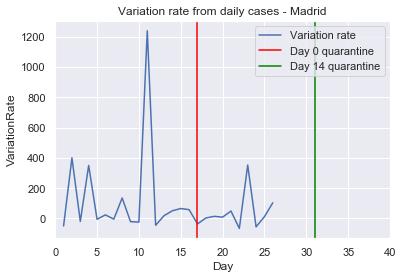

In [13]:
# Variation rate

sns.lineplot('Day', 'VariationRate', data = df_madrid, label = 'Variation rate')
plt.xlim(0,40)
plt.axvline(day_init_quarantine_madrid, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_madrid + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Variation rate from daily cases - Madrid')
plt.legend()
plt.show()

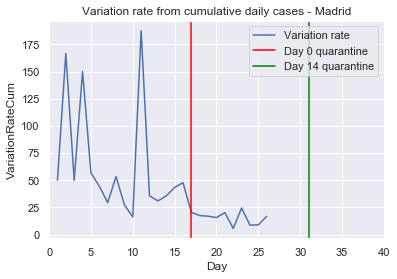

In [14]:
# Variation rate (cumulative) -- Tiene que tender a cero 

sns.lineplot('Day', 'VariationRateCum', data = df_madrid, label = 'Variation rate')
plt.xlim(0,40)
plt.axvline(day_init_quarantine_madrid, 0, 5000, color = 'red', label = 'Day 0 quarantine')
plt.axvline(day_init_quarantine_madrid + 14, 0, 5000, color = 'green', label = 'Day 14 quarantine')
plt.title('Variation rate from cumulative daily cases - Madrid')
plt.legend()
plt.show()